In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
lr_list = os.listdir("/content/drive/MyDrive/IP_project/data/original")

In [ ]:
import cv2
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import numpy as np
import os

In [ ]:
# Define the paths to the folders containing images
original_folder = '/content/drive/MyDrive/IP_project/data/original'
bilinear_folder = '/content/drive/MyDrive/IP_project/data/bilinear'
bicubic_folder = '/content/drive/MyDrive/IP_project/data/bicubic'
lanczos_folder = '/content/drive/MyDrive/IP_project/data/lanczos'

# Initialize variables to accumulate scores
psnr_scores_bilinear = []
psnr_scores_bicubic = []
psnr_scores_lanczos = []

ssim_scores_bilinear = []
ssim_scores_bicubic = []
ssim_scores_lanczos = []

mse_scores_bilinear = []
mse_scores_bicubic = []
mse_scores_lanczos = []

In [ ]:

# Get the list of file names in the original folder
file_names = os.listdir(original_folder)


In [ ]:
i=0
for file_name in file_names:
    # Load the original image


    original_image = cv2.imread(os.path.join(original_folder, file_name), cv2.IMREAD_COLOR)

    # Load the downscaled images produced by different methods
    downscaled_image_bilinear = cv2.imread(os.path.join(bilinear_folder, file_name), cv2.IMREAD_COLOR)
    downscaled_image_bicubic = cv2.imread(os.path.join(bicubic_folder, file_name), cv2.IMREAD_COLOR)
    downscaled_image_lanczos = cv2.imread(os.path.join(lanczos_folder, file_name), cv2.IMREAD_COLOR)

    # Resize the downscaled images to match the dimensions of the original image
    downscaled_image_bilinear = cv2.resize(downscaled_image_bilinear, (original_image.shape[1], original_image.shape[0]))
    downscaled_image_bicubic = cv2.resize(downscaled_image_bicubic, (original_image.shape[1], original_image.shape[0]))
    downscaled_image_lanczos = cv2.resize(downscaled_image_lanczos, (original_image.shape[1], original_image.shape[0]))

    # Convert the images to grayscale
    original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    downscaled_gray_bilinear = cv2.cvtColor(downscaled_image_bilinear, cv2.COLOR_BGR2GRAY)
    downscaled_gray_bicubic = cv2.cvtColor(downscaled_image_bicubic, cv2.COLOR_BGR2GRAY)
    downscaled_gray_lanczos = cv2.cvtColor(downscaled_image_lanczos, cv2.COLOR_BGR2GRAY)

    # Compute PSNR
    psnr_scores_bilinear.append(psnr(original_gray, downscaled_gray_bilinear))
    psnr_scores_bicubic.append(psnr(original_gray, downscaled_gray_bicubic))
    psnr_scores_lanczos.append(psnr(original_gray, downscaled_gray_lanczos))

    # Compute SSIM
    ssim_scores_bilinear.append(ssim(original_gray, downscaled_gray_bilinear))
    ssim_scores_bicubic.append(ssim(original_gray, downscaled_gray_bicubic))
    ssim_scores_lanczos.append(ssim(original_gray, downscaled_gray_lanczos))

    # Compute MSE
    mse_scores_bilinear.append(np.mean((original_gray - downscaled_gray_bilinear) ** 2))
    mse_scores_bicubic.append(np.mean((original_gray - downscaled_gray_bicubic) ** 2))
    mse_scores_lanczos.append(np.mean((original_gray - downscaled_gray_lanczos) ** 2))

In [ ]:
# Calculate average scores
avg_psnr_bilinear = np.mean(psnr_scores_bilinear)
avg_psnr_bicubic = np.mean(psnr_scores_bicubic)
avg_psnr_lanczos = np.mean(psnr_scores_lanczos)

avg_ssim_bilinear = np.mean(ssim_scores_bilinear)
avg_ssim_bicubic = np.mean(ssim_scores_bicubic)
avg_ssim_lanczos = np.mean(ssim_scores_lanczos)

avg_mse_bilinear = np.mean(mse_scores_bilinear)
avg_mse_bicubic = np.mean(mse_scores_bicubic)
avg_mse_lanczos = np.mean(mse_scores_lanczos)

In [ ]:
# Print the average scores
print("Average PSNR (Bilinear):", avg_psnr_bilinear)
print("Average PSNR (Bicubic):", avg_psnr_bicubic)
print("Average PSNR (Lanczos):", avg_psnr_lanczos)
print("\n")
print("Average SSIM (Bilinear):", avg_ssim_bilinear)
print("Average SSIM (Bicubic):", avg_ssim_bicubic)
print("Average SSIM (Lanczos):", avg_ssim_lanczos)
print("\n")
print("Average MSE (Bilinear):", avg_mse_bilinear)
print("Average MSE (Bicubic):", avg_mse_bicubic)
print("Average MSE (Lanczos):", avg_mse_lanczos)



Average PSNR (Bilinear): 21.540486404879513
Average PSNR (Bicubic): 20.43180941550143
Average PSNR (Lanczos): 20.93205434756066


Average SSIM (Bilinear): 0.6371095029494646
Average SSIM (Bicubic): 0.6022496494771913
Average SSIM (Lanczos): 0.6220902527627871


Average MSE (Bilinear): 56.60928680937169
Average MSE (Bicubic): 57.55102280438957
Average MSE (Lanczos): 58.04465083752648


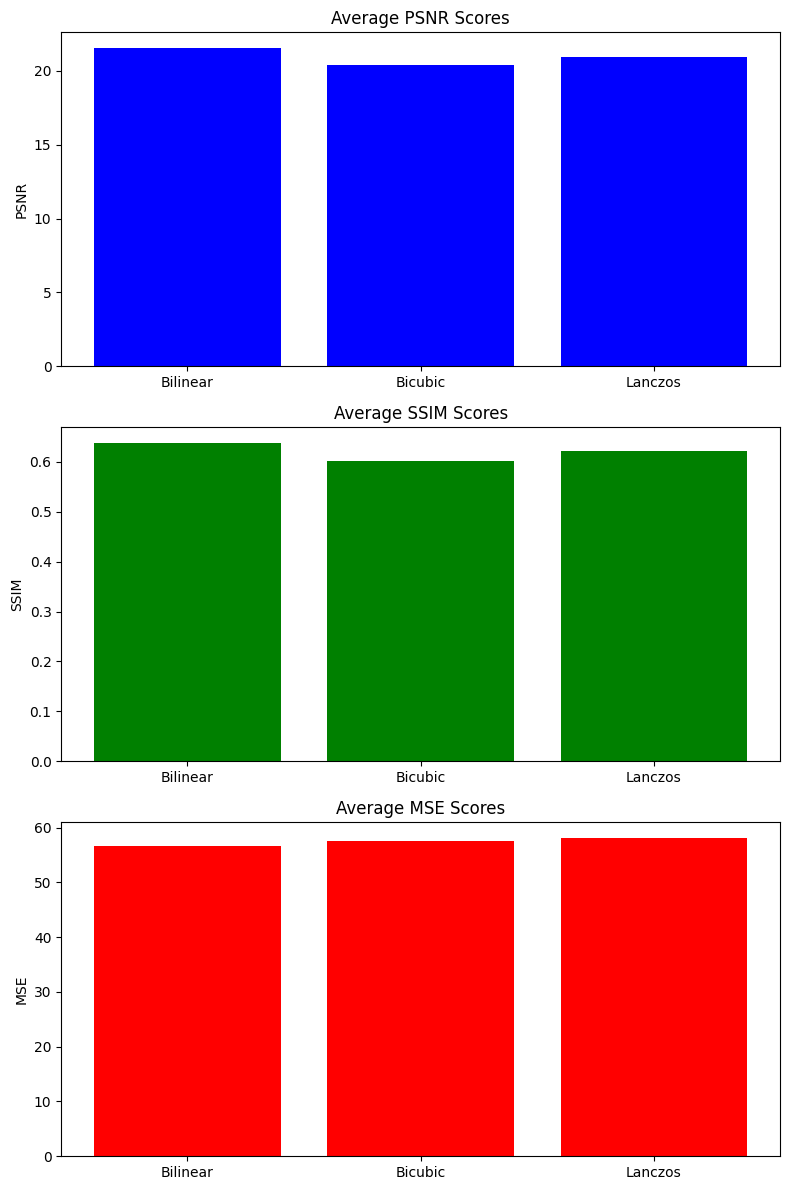

In [ ]:
import matplotlib.pyplot as plt

# Plot the bar graphs
methods = ['Bilinear', 'Bicubic', 'Lanczos']
psnr_scores = [avg_psnr_bilinear, avg_psnr_bicubic, avg_psnr_lanczos]
ssim_scores = [avg_ssim_bilinear, avg_ssim_bicubic, avg_ssim_lanczos]
mse_scores = [avg_mse_bilinear, avg_mse_bicubic, avg_mse_lanczos]

fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot PSNR bar graph
axes[0].bar(methods, psnr_scores, color='blue')
axes[0].set_title('Average PSNR Scores')
axes[0].set_ylabel('PSNR')

# Plot SSIM bar graph
axes[1].bar(methods, ssim_scores, color='green')
axes[1].set_title('Average SSIM Scores')
axes[1].set_ylabel('SSIM')

# Plot MSE bar graph
axes[2].bar(methods, mse_scores, color='red')
axes[2].set_title('Average MSE Scores')
axes[2].set_ylabel('MSE')

plt.tight_layout()
plt.show()
